# Method: Kernel Ridge Regression

This notebook includes the implementation of kernel ridge regression.

### Imports

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

### Implementation

In [136]:
# Build kernels
def k_RBF(x, y, sigma):
    return np.exp(-1 / (2 * sigma**2) * (np.linalg.norm(x-y))**2)

# Build kernel matrix function
def KernelMatrix(x, y, kernel):
    M = len(x)
    N = len(y)
    K = np.array([[kernel(x[i], y[j]) for j in range(N)] for i in range(M)])
    return K

# Define function to solve kernel ridge regression
def KernelRidgeRegression(K, y, C=0.3):
    N = len(y)
    A = (K + C*np.identity(N)) 
    theta = np.linalg.solve(A, y)
    return theta

# Predict on new data
def KernelPrediction(K, theta): 
    return K @ theta

### Example

We start by defining the sinc function.

In [153]:
def sinc(t,c):
    if t == c:
        return 1
    else:
        return math.sin(t-c)/(t-c)

Then we compute the values.

In [154]:
c = 25
t = np.linspace(0,50,1000)
y = np.array([sinc(t,c) for t in t])

Then sample 50 random points from the samples.

In [155]:
x = list(zip(t,y))
s = random.choices(x, k=63)
s_t = [s[0] for s in s]
s_y = [s[1] for s in s]

Then we visualize the signal.

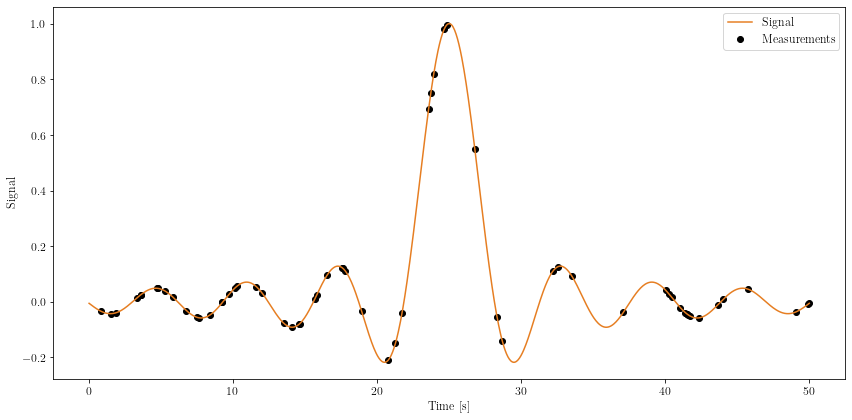

In [156]:
# Define colors
corporate_colors = {
    'blue': '#3498db', 
    'light_blue': '#66a8cc', 
    'black': '#000000',
    'light_green': '#55efc4',
    'orange': '#e67e22'}

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Settings
plt.rc('text', usetex=True) 
plt.rc('font', family='serif') 
plt.rcParams.update({'font.size': 12})

# Plot for the first subplot
ax.plot(t, y, label="Signal", color=corporate_colors['orange'])
ax.scatter(s_t, s_y, label="Measurements", color=corporate_colors['black'])
ax.set_xlabel('Time [s]') 
ax.set_ylabel('Signal') 
ax.legend()
plt.tight_layout()
plt.show()

Then we find the parameters based on the measurements.

In [157]:
# Define parameters (use cross-validation to find these)
sigma = 1.2/np.sqrt(2)
C = 0.1

# Define the kernel
kernel = lambda x, y: k_RBF(x,y,sigma)

# Solve kernel ridge regression on data
K_data = KernelMatrix(s_t, s_t, kernel) 
theta = KernelRidgeRegression(K_data,s_y,C)

# Predict on new data
K_predict = KernelMatrix(t, s_t, kernel) 
y_hat = KernelPrediction(K_predict, theta)

Then we show the result.

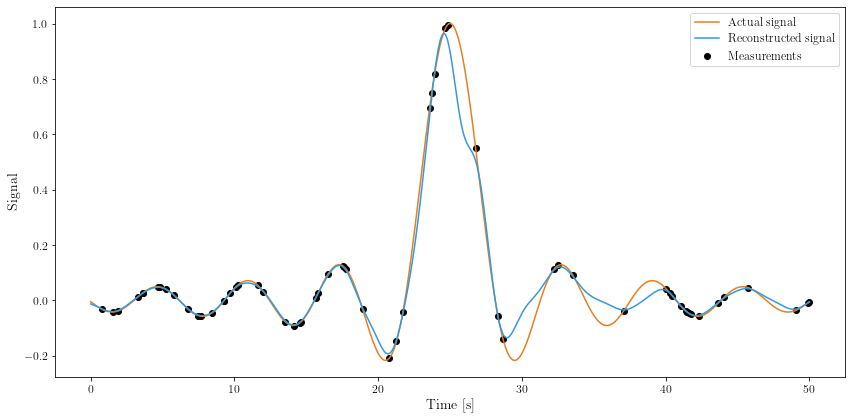

In [160]:
# Define colors
corporate_colors = {
    'blue': '#3498db', 
    'light_blue': '#66a8cc', 
    'black': '#000000',
    'light_green': '#55efc4',
    'orange': '#e67e22'}

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Settings
plt.rc('text', usetex=True) 
plt.rc('font', family='serif') 
plt.rcParams.update({'font.size': 12})

# Plot for the first subplot
ax.plot(t, y, label="Actual signal", color=corporate_colors['orange'])
ax.plot(t, y_hat, label="Reconstructed signal", color=corporate_colors['blue'])
ax.scatter(s_t, s_y, label="Measurements", color=corporate_colors['black'])
ax.set_xlabel('Time [s]', fontsize=14) 
ax.set_ylabel('Signal', fontsize=14) 
ax.legend()
plt.tight_layout()
plt.show()

The solution is based on minimizing the squared loss function. Hence, the model is does not use assumptions on the distribution of the underlying data (apart from the radial kernel being the best choice), but it lacks quantification of uncertainty!

The kernel trick was applied by using the Representers theorem (abstract function is replaced by linear combination of kernel weights). This means that the inner products, of the unknown functions, were replaced by kernel evaluations.